# Cynthia Kielpinski

## Research Interests:

By majoring in statistics, I have always had a passion for the process behind statistics. The collection of data, the wrangling and processing of the data, exploratory analysis of the data, interpreting the analysis, and then finalizing the process by formulating a conclusion from the analysis. One fundamental ideal in statistics I have learned is that without an interdiscplinary field, you do not have the data and you are simply performing pure statistics. As per this comment, I have never found interest in pure statistics thus I found a passion in the interdisciplinary field of ecology and environmental sciences. For this project, my research interests are focus on exploratory statistics (required) and an environmental or ecological factor. Environmental data is more prominent  than ecological from my persepctive thus I have decided to focus on an environmental influence. Since our group decided on usng a summer and winter Olympics dataset, I though to refine my first research question to involve different countries performance in the summer and winter olympics influenced by their "local" climate. Competition is always a prfound topic, and I was also interested in how countries perform in their home country versus a visiting country. 

## Research Question: (updated 03-01-2023)

1. **Does the annual average temperature of a country determine a correlation between the probability or likelihood of preforming more successfully in the summer or winter Olympics in individual disciplines?** 

I have decided to use a Bernoulli distribution as the designation for "hot" (1) and "cold" (0) climates. I used the annual temperature column to calculate the overall average annual temperature for all the countries in the dataset to determine a "threshold" for determining if a country is "hot" and "cold" by using a Bernoulli distribution. For example, does Canada have a better probability of winning medals in the winter Olympics since it is considered to be a cold climate according to my Bernoulli distribution? Does Brazil have a better probability of winning medals in the summer Olympics since it is in the hot designation? Or is there no correlation between a countries climate classification and which Olympics the country preforms better in? I will explore the correlations between countries and their climates in regards to number of medals won in each of the respective summer or winter Olympic events. Overall, to answer this research question, my main form of analysis will be a multiple linear regression using categorical(dummy) variables and quantitative variables.

## Exploratory Data Analysis Plan: (updated 03-01-2023)

To determine some answers into starting to answer my research question, I will use descriptive and exploratory techniques such as... Some of my ideas for more advanced analyses are: multiple linear regression analysis, and potentially using principal component analysis. From briefly looking over the datasets, the above methods are a brief thought to the possibilities when exploring the data. After wrangling the data, I will define the specific analyses methods I choose to use. I have a background in Statistics, thus deciding what analyses will be used at a later stage will be an simplistic decision. 

I will complete as little wrangling as needed, but I have visioned the data to be cleaner and more orderly without taking hours on wrangining. I think my current plan is to edit/wrangle each dataset, and then merge all of the separate datasets together so I have one uniform dataset to work with. I will change some column names for ease of analyses, and try to keep everything simplistic. Some columns I am thinking of adding as of now are: total number of medals won, total number of gold, silver and bronze medals won, and maybe dome column for a way to rank the total number of "points" won to easily compute standings.

## Import Packages: (all packages needed for analysis, updated 02-12-2023)

In [55]:
## Import Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
## Data Upload:
OlympicHost = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")

OlympicMedals = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")

GDPCountry = pd.read_csv("../../data/raw/GDPbyCountry.csv")

HistTemp = pd.read_csv("../../data/raw/HistoricalTemperatureData.csv")

#### Notes: About the Historical Temperature Data and the GDP Datasets

The following links are from the World Bank Website which has the following license as described below. 

For whatever reason, this link no longer exists?!?! I have no idea why??

[Historical Average Temperature Data per Country](https://datacatalog.worldbank.org/search/dataset/00402760) 

[Gross Domestic Product Data:](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

By looking into the licenses for the data from the [World Bank Website](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets) it quotes that the license "[u]nless specifically labeled otherwise, these Datasets are provided to you under a Creative Commons Attribution 4.0 International License (CC BY 4.0), with the additional terms below."


## Initial Edits and Observations: 

In [3]:
OlympicHost1 = OlympicHost.drop(columns=["game_end_date", "game_start_date"])

In [4]:
OlympicHost1.head(5)

,game_slug,game_location,game_name,game_season,game_year
0,beijing-2022,China,Beijing 2022,Winter,2022
1,tokyo-2020,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,Brazil,Rio 2016,Summer,2016
4,sochi-2014,Russian Federation,Sochi 2014,Winter,2014


In [5]:
OlympicMedals = OlympicMedals.drop(columns=["athlete_url", "athlete_full_name","participant_title","country_code"])
OlympicMedals.head(5)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,Afghanistan,AFG
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,Afghanistan,AFG
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,Netherlands Antilles,AHO
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,Algeria,ALG
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,Algeria,ALG


In [6]:
OlympicMedals = OlympicMedals.rename(columns={"discipline_title": "discipline", "slug_game": "game_slug","event_title": "event","event_gender": "event_sex",
                             "medal_type": "medal_type","participant_type": "participant_type","country_name": "country","country_3_letter_code": "country_code"})
OlympicMedals.head(5)

,discipline,game_slug,event,event_sex,medal_type,participant_type,country,country_code
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,Afghanistan,AFG
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,Afghanistan,AFG
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,Netherlands Antilles,AHO
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,Algeria,ALG
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,Algeria,ALG


In [7]:
OlympicMedals = OlympicMedals[OlympicMedals["participant_type"] == "Athlete"]

## Establish Point Values:
point_value = []
for row in OlympicMedals["medal_type"]:
        if row == "GOLD" :    point_value.append(3)
        elif row == "SILVER" :  point_value.append(2)
        else:           point_value.append(1)
        
OlympicMedals["point_value"] = point_value
OlympicMedals.head(5)

,discipline,game_slug,event,event_sex,medal_type,participant_type,country,country_code,point_value
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,Netherlands Antilles,AHO,2
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,Algeria,ALG,2
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,Algeria,ALG,2


In [8]:
OlympicMedals1 = OlympicMedals
OlympicMedals1.head(5)

,discipline,game_slug,event,event_sex,medal_type,participant_type,country,country_code,point_value
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,Afghanistan,AFG,1
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,Netherlands Antilles,AHO,2
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,Algeria,ALG,2
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,Algeria,ALG,2


In [9]:
HistTemp.head(5)

,country_code,country,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
0,AFG,Afganistan,AFG,0.07,2.11,7.60,13.37,18.22,23.20,25.26,23.77,19.03,12.99,7.00,2.43,12.92
1,AGO,Angola,AGO,22.58,22.68,22.78,22.35,20.74,18.37,17.95,19.90,22.19,23.18,22.79,22.61,21.51
2,ALB,Albania,ALB,2.02,3.22,6.04,9.92,14.44,17.93,20.54,20.48,17.16,12.27,7.58,3.65,11.27
3,UAE,United Arab Emirates,ARE,18.43,19.43,22.61,26.58,30.62,32.46,33.80,33.55,31.74,28.34,24.06,20.28,26.83
4,ARG,Argentina,ARG,20.80,19.90,17.51,14.05,10.65,7.66,7.42,9.02,11.53,14.67,17.54,19.83,14.22


In [10]:
HistTemp = HistTemp.rename(columns = {"ISO_3DIGIT": "WRONG_country_code", "Jan_Temp": "Jan_temp", 
                                      "Apr_Temp": "Apr_temp", "Jun_Temp": "Jun_temp", "July_Temp":"July_temp",
                                      "Aug_Temp": "Aug_temp", "Nov_Temp": "Nov_temp"})

HistTemp1 = HistTemp.drop(columns=["country", "WRONG_country_code", "Jan_temp", "Feb_temp", "Mar_temp", "Apr_temp", "May_temp", "Jun_temp",
                                 "July_temp", "Aug_temp", "Sept_temp", "Oct_temp", "Nov_temp", "Dec_temp"])

## Mean Temp: 17.965506 degrees celsius
MeanTemp = HistTemp1[["Annual_temp"]].mean()

## Dummy Variable: Categorical (1: Hot, 0: Cold)
hot_cold = []
for row in HistTemp1["Annual_temp"]:
        if row > 17.95 :    hot_cold.append(1)
        else:           hot_cold.append(0)
        
HistTemp1["hot_cold"] = hot_cold
HistTemp1.head(5)

,country_code,Annual_temp,hot_cold
0,AFG,12.92,0
1,AGO,21.51,1
2,ALB,11.27,0
3,UAE,26.83,1
4,ARG,14.22,0


In [11]:
## This data set is going to need a bit of wrangling... (HUGE YIKES -_-)
GDPCountry = GDPCountry.drop([0,2])
GDPCountry = GDPCountry.drop([1])
GDPCountry = GDPCountry.drop(columns=["Unnamed: 3"])
GDPCountry = GDPCountry.drop([3])

In [12]:
GDPCountry = GDPCountry.rename(columns = {"Data Source": "country_name", "World Development Indicators": "country_code", 
                                          "Unnamed: 2": "GDP", "Unnamed: 4": "1960", "Unnamed: 5": "1961", "Unnamed: 6": "1962",
                                          "Unnamed: 7": "1963", "Unnamed: 8": "1964", "Unnamed: 9": "1965", "Unnamed: 10": "1966",
                                          "Unnamed: 11": "1967", "Unnamed: 12": "1968", "Unnamed: 13": "1969", "Unnamed: 14": "1970",
                                          "Unnamed: 15": "1971","Unnamed: 16": "1972","Unnamed: 17": "1973","Unnamed: 18": "1974",
                                          "Unnamed: 19": "1975","Unnamed: 20": "1976","Unnamed: 21": "1977","Unnamed: 22": "1978",
                                          "Unnamed: 23": "1979","Unnamed: 24": "1980","Unnamed: 25": "1981","Unnamed: 26": "1982",
                                          "Unnamed: 27": "1983","Unnamed: 28": "1984","Unnamed: 29": "1985","Unnamed: 30": "1986",
                                          "Unnamed: 31": "1987","Unnamed: 32": "1988","Unnamed: 33": "1989","Unnamed: 34": "1990",
                                          "Unnamed: 35": "1991","Unnamed: 36": "1992","Unnamed: 37": "1993","Unnamed: 38": "1994",
                                          "Unnamed: 39": "1995","Unnamed: 40": "1996","Unnamed: 41": "1997","Unnamed: 42": "1998",
                                          "Unnamed: 43": "1999","Unnamed: 44": "2000","Unnamed: 45": "2001","Unnamed: 46": "2002",
                                          "Unnamed: 47": "2003","Unnamed: 48": "2004","Unnamed: 49": "2005","Unnamed: 50": "2006",
                                          "Unnamed: 51": "2007","Unnamed: 52": "2008","Unnamed: 53": "2009","Unnamed: 54": "2010",
                                          "Unnamed: 55": "2011","Unnamed: 56": "2012","Unnamed: 57": "2013","Unnamed: 58": "2014",
                                          "Unnamed: 59": "2015","Unnamed: 60": "2016","Unnamed: 61": "2017","Unnamed: 62": "2018",
                                          "Unnamed: 63": "2019","Unnamed: 64": "2020","Unnamed: 65": "2021"})

In [13]:
GDPCountry.to_csv("../../data/raw/New_GDP.csv")

In [14]:
NewGDP = pd.read_csv("../../data/raw/New_GDP.csv")
NewGDP=NewGDP.drop(columns=["Unnamed: 0"])

In [15]:
## Drop the NaN Values: (I am currently assuming is the World Bank doesn't have a GDP for the country, the country code doesn't match a place in the Olympics..)
GDP_NONA = NewGDP.dropna()

In [16]:
## Average GDP from 1960 to 2021:
average_GDP = GDP_NONA[["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                       "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982",
                       "1983","1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994",
                       "1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015",
                       "2016","2017","2018","2019","2020","2021"]].mean(axis=1)
GDP_NONA

,country_name,country_code,GDP,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,GDP (current US$),2.129081e+10,2.180870e+10,2.370727e+10,2.821034e+10,2.611906e+10,2.968249e+10,3.223946e+10,...,9.725730e+11,9.834730e+11,1.003770e+12,9.245230e+11,8.827210e+11,1.021120e+12,1.007240e+12,1.001020e+12,9.274840e+11,1.080710e+12
3,Africa Western and Central,AFW,GDP (current US$),1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
13,Australia,AUS,GDP (current US$),1.860567e+10,1.968194e+10,1.992160e+10,2.153881e+10,2.379998e+10,2.597491e+10,2.730653e+10,...,1.546890e+12,1.576380e+12,1.467550e+12,1.350620e+12,1.206540e+12,1.326520e+12,1.428290e+12,1.392230e+12,1.326900e+12,1.552670e+12
14,Austria,AUT,GDP (current US$),6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,...,4.094020e+11,4.301910e+11,4.425850e+11,3.819710e+11,3.958370e+11,4.172610e+11,4.549910e+11,4.446210e+11,4.352250e+11,4.803680e+11
16,Burundi,BDI,GDP (current US$),1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,...,2.333341e+09,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.576519e+09,2.649672e+09,2.779813e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,St. Vincent and the Grenadines,VCT,GDP (current US$),1.306656e+07,1.399988e+07,1.452488e+07,1.370822e+07,1.475821e+07,1.510821e+07,1.609987e+07,...,7.300326e+08,7.647813e+08,7.709014e+08,7.865546e+08,8.143023e+08,8.476202e+08,8.843282e+08,9.101497e+08,8.721346e+08,9.041815e+08
259,World,WLD,GDP (current US$),1.392280e+12,1.448630e+12,1.550550e+12,1.671610e+12,1.830290e+12,1.993910e+12,2.163900e+12,...,7.550120e+13,7.760720e+13,7.973320e+13,7.518780e+13,7.646150e+13,8.140070e+13,8.645690e+13,8.764530e+13,8.510560e+13,9.651310e+13
263,South Africa,ZAF,GDP (current US$),8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,...,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11
264,Zambia,ZMB,GDP (current US$),7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10


In [17]:
## Remove the Other Years:
GDP = GDP_NONA.drop(columns=["GDP","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971",
                       "1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982",
                       "1983","1984","1985","1986","1987","1988","1989","1990", "1991","1992","1993","1994",
                       "1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015",
                       "2016","2017","2018","2019","2020","2021"])
GDP.head(5)

,country_name,country_code
1,Africa Eastern and Southern,AFE
3,Africa Western and Central,AFW
13,Australia,AUS
14,Austria,AUT
16,Burundi,BDI


In [18]:
## Merge Data Sets:
Olympic1 = pd.merge(OlympicHost1, OlympicMedals1, on="game_slug")
Olympic2 = pd.merge(Olympic1, HistTemp1, on="country_code")

In [19]:
## Merge Data Sets: DO NOT DO THIS YET... CAUSES ISSUES
## OlympicFull = pd.merge(Olympic2, GDP, on="country_code")

In [20]:
## Winter Olympics:
WinterOlympic = Olympic2[Olympic2["game_season"]== "Winter"]
WinterOlympic.head(5)  

## Beijing 2022 Olympics:
WinterOlympicBeijing = Olympic2[Olympic2["game_slug"]== "beijing-2022"]
WinterOlympicBeijing.head(5)

,game_slug,game_location,game_name,game_season,game_year,discipline,event,event_sex,medal_type,participant_type,country,country_code,point_value,Annual_temp,hot_cold
0,beijing-2022,China,Beijing 2022,Winter,2022,Freestyle Skiing,Women's Moguls,Women,GOLD,Athlete,Australia,AUS,3,21.51,1
1,beijing-2022,China,Beijing 2022,Winter,2022,Snowboard,Men's Snowboard Halfpipe,Men,SILVER,Athlete,Australia,AUS,2,21.51,1
2,beijing-2022,China,Beijing 2022,Winter,2022,Snowboard,Women's Snowboard Slopestyle,Women,BRONZE,Athlete,Australia,AUS,1,21.51,1
3,beijing-2022,China,Beijing 2022,Winter,2022,Skeleton,Women,Women,SILVER,Athlete,Australia,AUS,2,21.51,1
32,pyeongchang-2018,Republic of Korea,PyeongChang 2018,Winter,2018,Snowboard,Men’s Snowboard Cross,Men,SILVER,Athlete,Australia,AUS,2,21.51,1


In [22]:
## Number of Gold Per Country:

WinterGold = WinterOlympic[WinterOlympic["medal_type"]=="GOLD"]
GoldLine = WinterGold["country"].unique()
GoldPerCountry = WinterGold[["country", "medal_type"]].groupby("country").count()

,game_slug,game_location,game_name,game_season,game_year,discipline,event,event_sex,medal_type,participant_type,country,country_code,point_value,Annual_temp,hot_cold
0,beijing-2022,China,Beijing 2022,Winter,2022,Freestyle Skiing,Women's Moguls,Women,GOLD,Athlete,Australia,AUS,3,21.51,1
1,beijing-2022,China,Beijing 2022,Winter,2022,Snowboard,Men's Snowboard Halfpipe,Men,SILVER,Athlete,Australia,AUS,2,21.51,1
2,beijing-2022,China,Beijing 2022,Winter,2022,Snowboard,Women's Snowboard Slopestyle,Women,BRONZE,Athlete,Australia,AUS,1,21.51,1
3,beijing-2022,China,Beijing 2022,Winter,2022,Skeleton,Women,Women,SILVER,Athlete,Australia,AUS,2,21.51,1
373,beijing-2022,China,Beijing 2022,Winter,2022,Snowboard,Men's Parallel Giant Slalom,Men,GOLD,Athlete,Austria,AUT,3,6.19,0


In [57]:
## Number of Silver Per Country:

WinterSilver = WinterOlympic[WinterOlympic["medal_type"]=="SILVER"]
SilverLine = WinterSilver["country"].unique()
SilverPerCountry = WinterSilver[["country", "medal_type"]].groupby("country").count()
SilverPerCountry

,medal_type
country,
Australia,7
Austria,75
Belarus,7
Belgium,1
Bulgaria,2
Canada,47
Croatia,6
Czech Republic,10
Czechoslovakia,3


In [56]:
## Number of Bronze Per Country:

WinterBronze = WinterOlympic[WinterOlympic["medal_type"]=="BRONZE"]
BronzeLine = WinterBronze["country"].unique()
BronzePerCountry = WinterBronze[["country", "medal_type"]].groupby("country").count()
BronzePerCountry

,medal_type
country,
Australia,5
Austria,78
Belarus,5
Belgium,3
Bulgaria,3
Canada,56
Croatia,1
Czech Republic,10
Czechoslovakia,10


In [59]:
## Total Points by Country:
TotalPointsCountry = WinterOlympic[["country", "point_value"]].groupby("country").sum()
TotalPointsCountry

,point_value
country,
Australia,37
Austria,405
Belarus,40
Belgium,8
Bulgaria,10
Canada,273
Croatia,25
Czech Republic,57
Czechoslovakia,22


In [109]:
## Summer Olympics:
SummerOlympic = Olympic2[Olympic2["game_season"]== "Summer"]
SummerOlympic.head(5)

,game_slug,game_location,game_name,game_season,game_year,discipline,event,event_sex,medal_type,participant_type,country,country_code,point_value,Annual_temp,hot_cold
4,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Diving,Women's 10m Platform,Women,BRONZE,Athlete,Australia,AUS,1,21.51,1
5,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Cycling Road,Men's Individual Time Trial,Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
6,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Boxing,Men's Light (57-63kg),Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
7,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Surfing,Men,Men,BRONZE,Athlete,Australia,AUS,1,21.51,1
8,tokyo-2020,Japan,Tokyo 2020,Summer,2020,Canoe Slalom,Women's Canoe,Women,GOLD,Athlete,Australia,AUS,3,21.51,1


## Exploratory Data Analysis: 

([<matplotlib.axis.XTick at 0x12f9fff10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

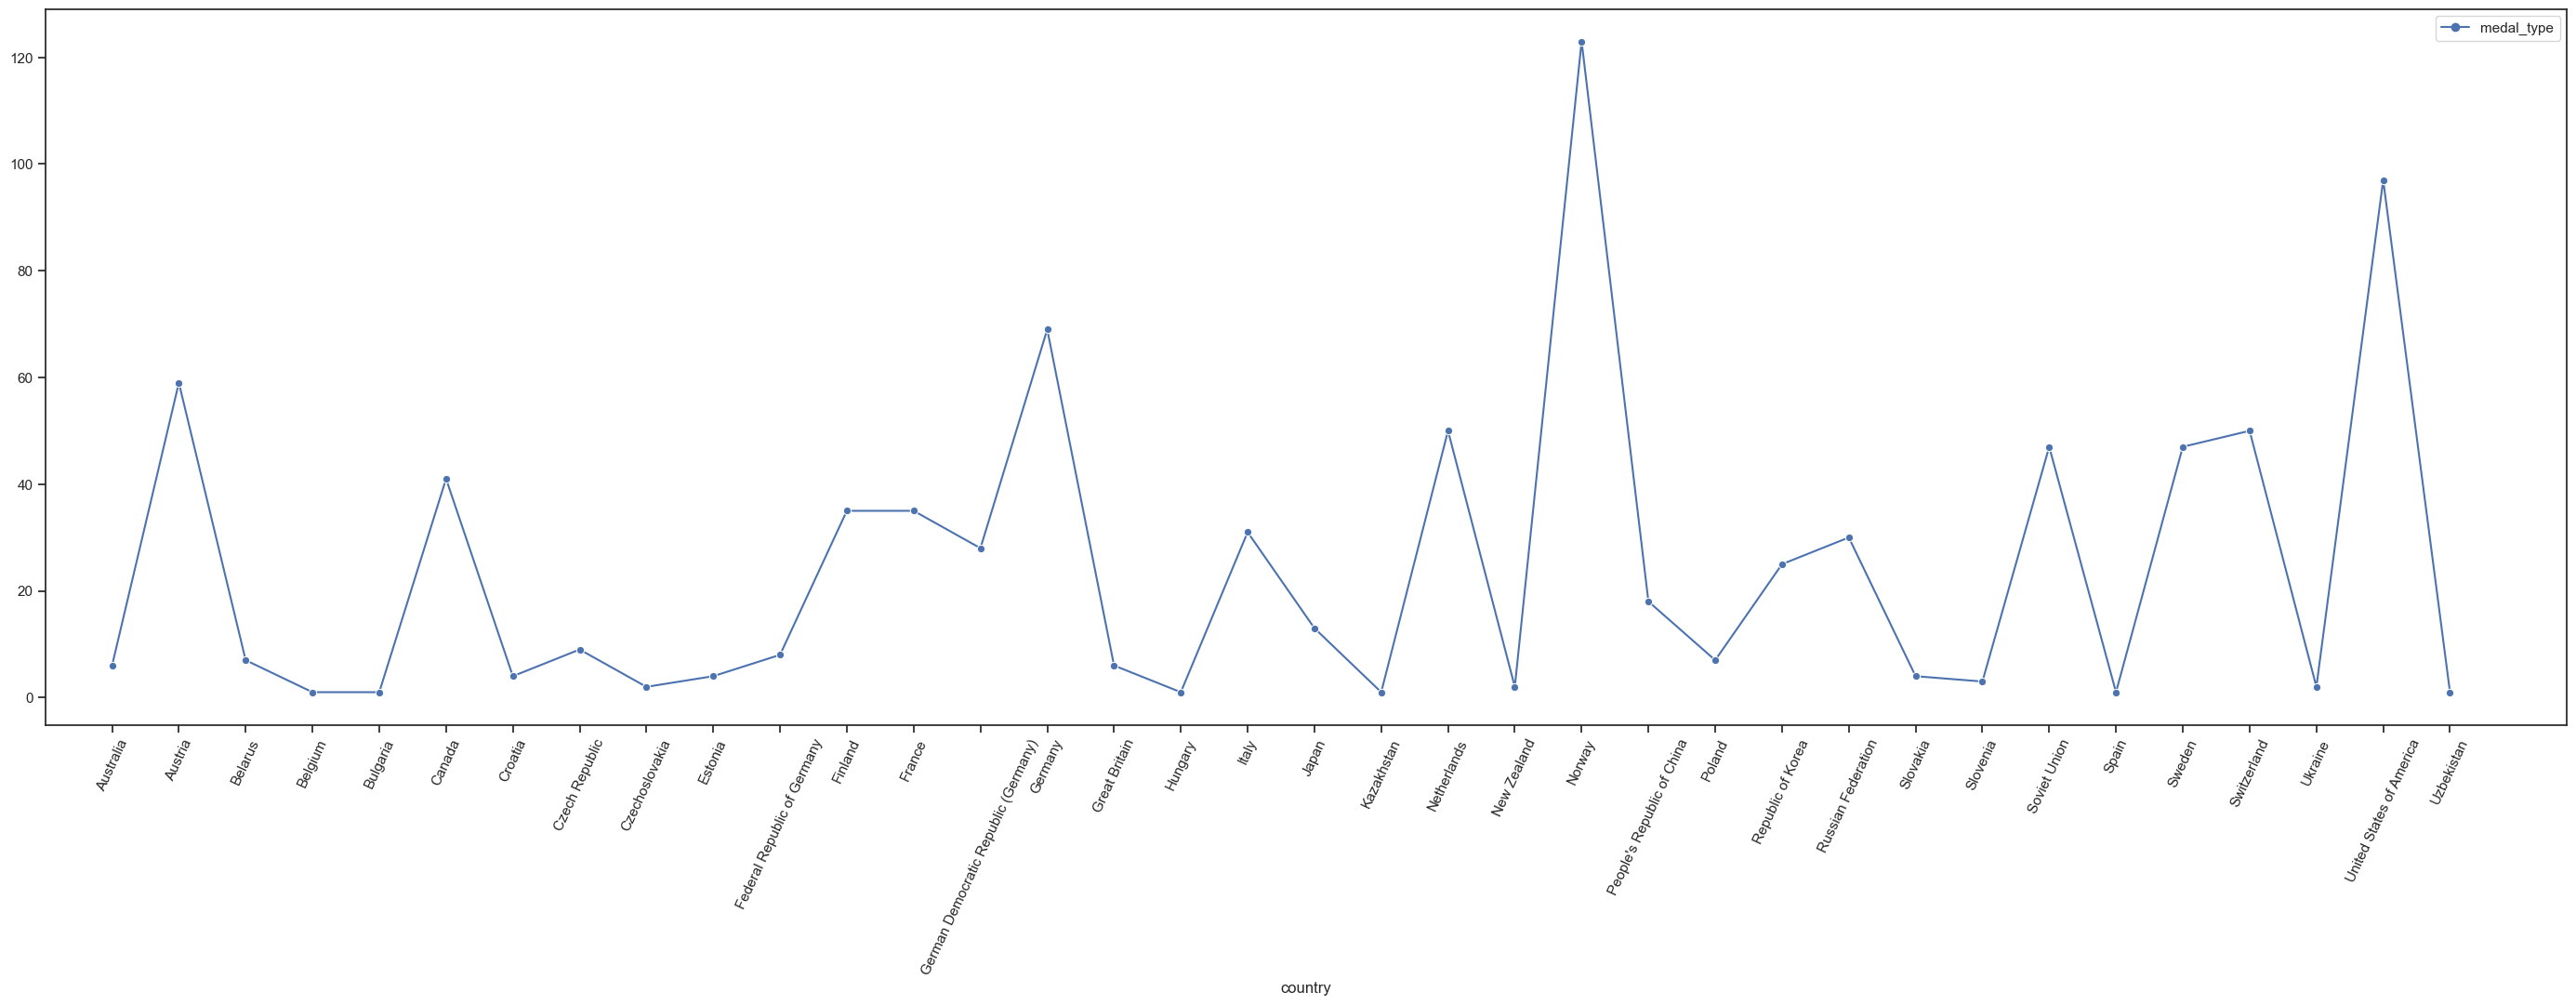

In [51]:
## Number of Gold Medals Per Country:
plt.figure(figsize=(35,10))

sns.lineplot(GoldPerCountry,markers=True)
sns.despine
plt.xlim(-1)
plt.xticks(GoldLine, rotation=65)

,medal_type
country,
Australia,7
Austria,75
Belarus,7
Belgium,1
Bulgaria,2
Canada,47
Croatia,6
Czech Republic,10
Czechoslovakia,3


,medal_type
country,
Australia,6
Austria,59
Belarus,7
Belgium,1
Bulgaria,1
Canada,41
Croatia,4
Czech Republic,9
Czechoslovakia,2


,medal_type
country,
Australia,6
Austria,59
Belarus,7
Belgium,1
Bulgaria,1
Canada,41
Croatia,4
Czech Republic,9
Czechoslovakia,2


,medal_type
country,
Australia,6
Austria,59
Belarus,7
Belgium,1
Bulgaria,1
Canada,41
Croatia,4
Czech Republic,9
Czechoslovakia,2
